In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
data = pd.read_csv('data/student.csv')

In [3]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

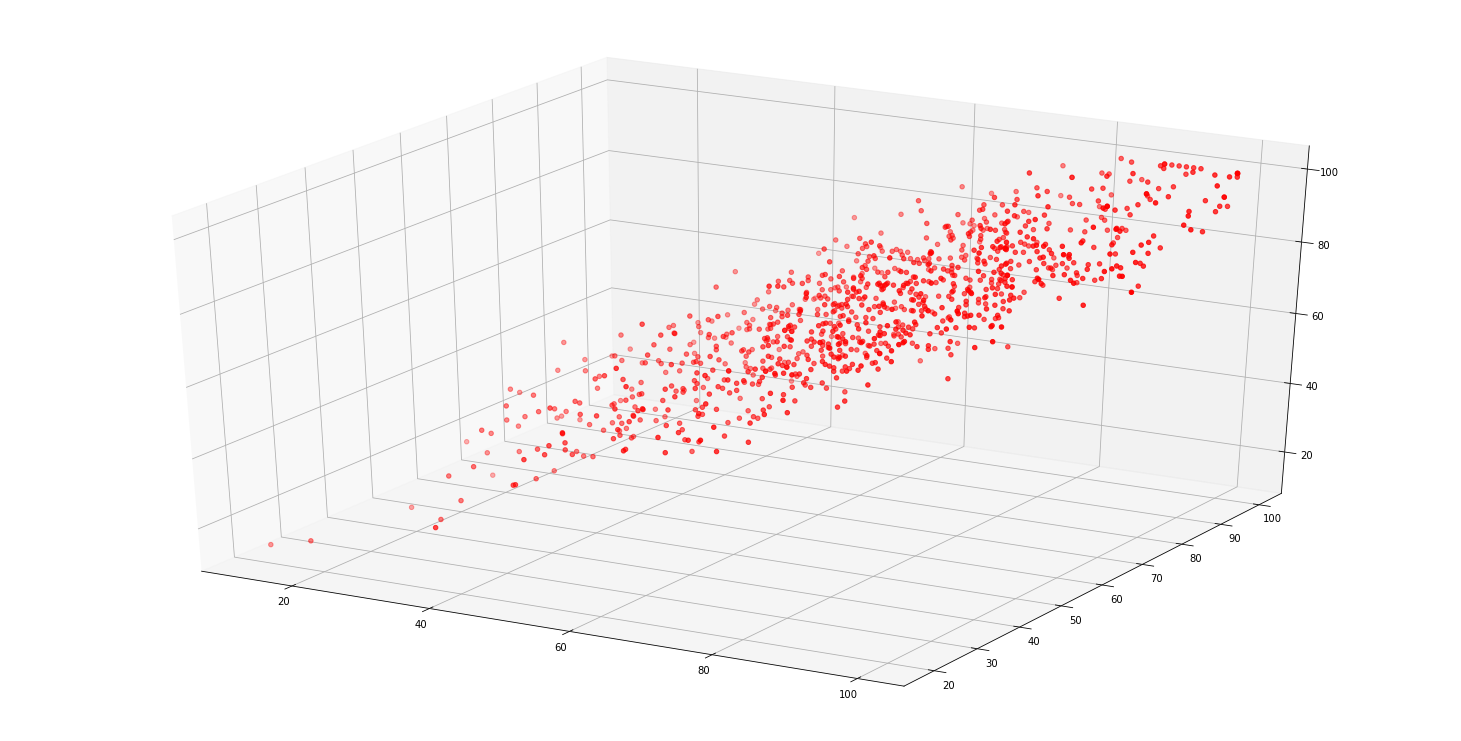

In [4]:
fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig)
ax.scatter(math,read,write,color='red')

In [5]:
n = len(math)
X0 = np.ones(n)
X = np.array([X0,math,read]).T
B = np.array([0,0,0])
Y = np.array(write)
alpha = 0.0001

In [8]:
def cost_function(X,Y,B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y)**2) / (2 * m)
    return J

In [9]:
cost_function(X,Y,B)

2470.1100000000001

In [15]:
def gradient_descent(X,Y,B,alpha,epochs):
    cost_history = [0] * epochs
    m = len(Y)
    
    for epoch in range(epochs):
        h = X.dot(B)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
        cost = cost_function(X,Y,B)
        cost_history[epoch] = cost
        
    return B, cost_history

In [16]:
newB, cost = gradient_descent(X,Y,B,alpha,100000)

In [17]:
cost[-1]

10.475123473539167

In [18]:
y_pred = X.dot(newB)

In [19]:
y_pred

array([ 65.20551024,  78.20356041,  78.8554444 ,  81.28567336,
        62.6048126 ,  81.54751456,  81.63888708,  46.99378843,
        75.40784138,  77.69215436,  67.38617435,  85.42742748,
        44.30171826,  77.23529176,  68.19625067,  43.66211063,
        69.00632699,  46.90241591,  87.13895263,  73.98271013,
        57.8357272 ,  64.22496523,  70.54738346,  52.15291661,
        83.25903972,  86.86483508,  64.68182783,  72.24663226,
        77.32666428,  79.28775429,  75.42011773,  86.95620759,
        72.07616358,  68.66538962,  42.05423434,  58.80399585,
        51.8665227 ,  75.78560781,  72.53302618,  43.02250299,
        84.61735116,  76.05972537,  61.35015003,  48.35209986,
        66.39335299,  70.7301285 ,  51.95789522,  72.07616358,
        97.88951889,  71.52792846,  98.80324408,  86.42024883,
        78.20356041,  49.60676242,  48.88805862,  48.5348449 ,
        54.76589061,  49.07080366,  68.75676214,  78.93454057,
        54.58314557,  89.94694802,  97.0003464 ,  80.92

In [20]:
write

array([ 63,  72,  78,  79,  62,  85,  83,  41,  80,  77,  64,  90,  45,
        77,  70,  46,  76,  44,  85,  72,  53,  66,  75,  49,  84,  83,
        68,  66,  77,  78,  74,  83,  72,  65,  46,  66,  50,  79,  68,
        46,  86,  70,  61,  53,  72,  75,  50,  77, 100,  81, 100,  87,
        78,  48,  50,  44,  48,  43,  67,  78,  58,  91,  92,  78,  42,
        85,  73,  83,  61,  58,  60,  55,  48,  62,  68,  59,  62,  48,
        74,  63,  80,  79,  73,  79,  45,  67,  89,  77,  81,  88,  53,
        68,  79,  77,  63,  73,  60,  67, 100,  79,  26,  51,  80,  57,
        41,  78,  68,  49,  76,  41,  71,  77,  89,  86,  55,  80,  56,
        74,  85,  80,  73,  74,  86,  56,  53,  44,  41,  59,  71,  81,
        74,  78,  67,  53,  56,  75,  82,  79,  99,  76,  59,  96,  75,
        61,  56,  88,  65, 100,  79,  55,  61,  83,  74,  59,  54,  47,
        82,  74,  59,  74,  84,  59,  43,  65,  61,  78,  84,  73,  73,
        92,  63,  72,  61,  59,  70,  87,  78,  65,  73,  62,  6